=== Logistic Regression Metrics ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       289

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608

Confusion Matrix:
 [[319   0]
 [  0 289]]
Logistic Regression ROC-AUC: 1.0


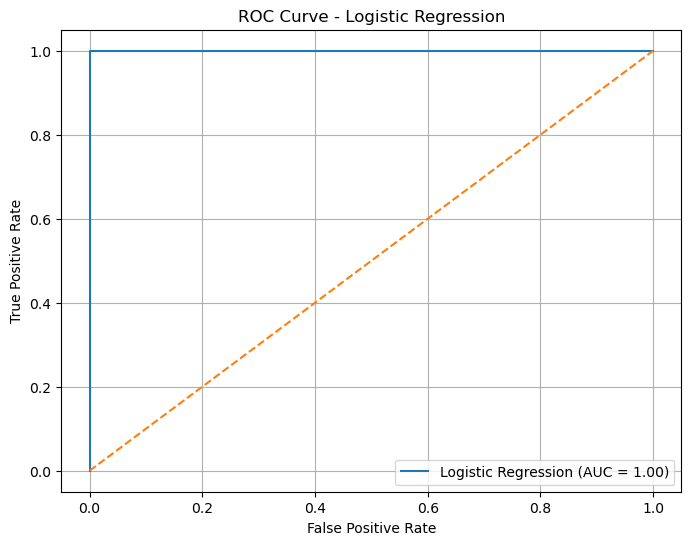


=== Random Forest Metrics ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       319
           1       0.97      0.93      0.95       289

    accuracy                           0.95       608
   macro avg       0.95      0.95      0.95       608
weighted avg       0.95      0.95      0.95       608

Confusion Matrix:
 [[310   9]
 [ 20 269]]
Random Forest ROC-AUC: 0.99512425290972


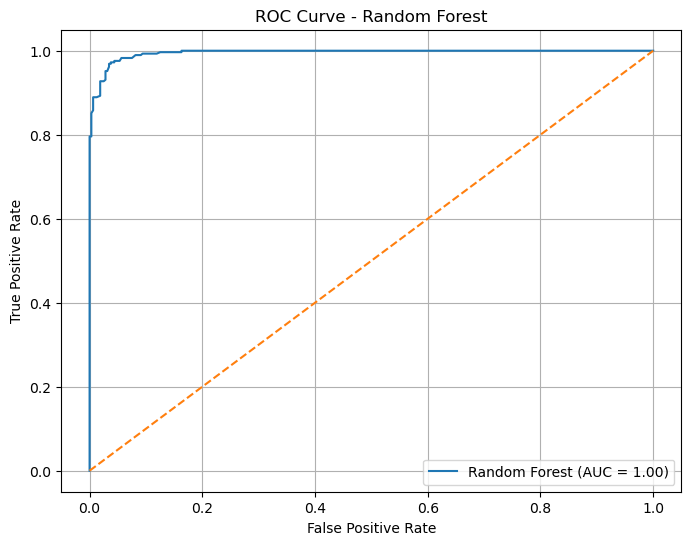


Model Accuracy Comparison:
Logistic Regression Accuracy: 1.0000
Random Forest Accuracy: 0.9523


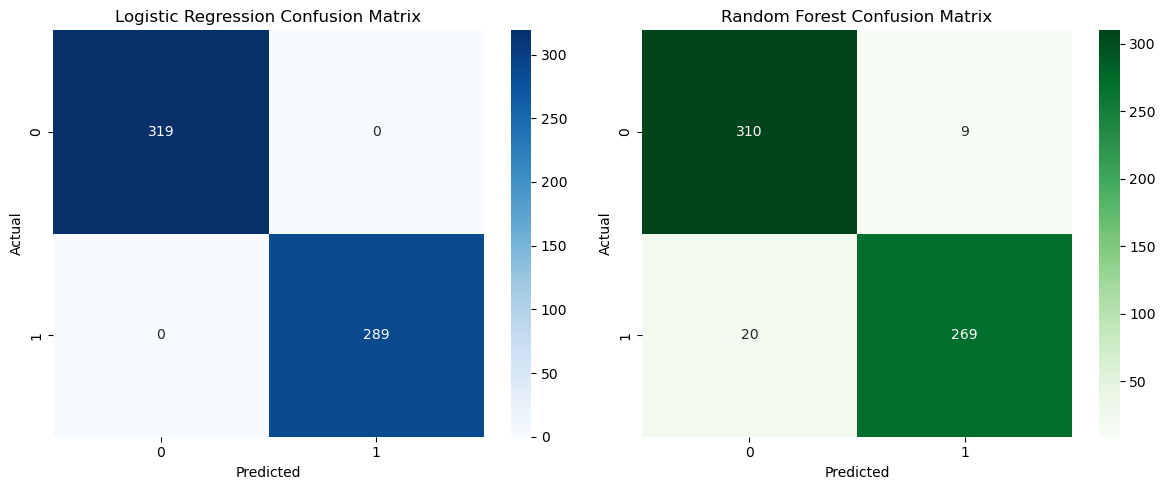

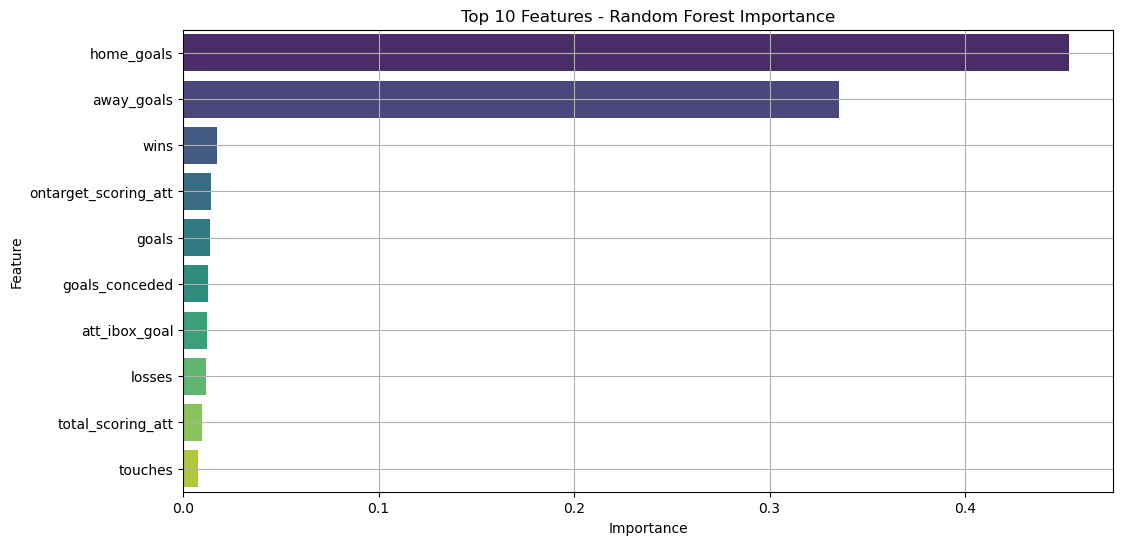

In [2]:
# Football Dataset - Modeling Notebook

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

# Load datasets
data1 = pd.read_csv('archive/results.csv')
data2 = pd.read_csv('archive/stats.csv')

# ----------- DATA PREPROCESSING -----------

# Merging datasets based on teams and season
merged_data = pd.merge(data1, data2, left_on=['home_team', 'season'], right_on=['team', 'season'], how='left')
merged_data.drop(columns=['team'], inplace=True)

# Drop any rows with missing values
merged_data.dropna(inplace=True)

# Create target variable (Binary Classification: Win vs No-Win)
merged_data['target'] = merged_data['result'].apply(lambda x: 1 if x == 'H' else 0)

# Drop unnecessary columns
features = merged_data.drop(['result', 'home_team', 'away_team', 'season', 'target'], axis=1)
target = merged_data['target']

# Encode categorical features if present
label_encoders = {}
for column in features.select_dtypes(include='object').columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ----------- MODELING -----------

# 1. Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)

# Metrics for Logistic Regression
print("=== Logistic Regression Metrics ===")
print(classification_report(y_test, log_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_y_pred))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Metrics for Random Forest
print("\n=== Random Forest Metrics ===")
print(classification_report(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# ----------- MODEL COMPARISON -----------

# Accuracy Comparison
log_accuracy = accuracy_score(y_test, log_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print("\nModel Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Confusion Matrix Comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, log_y_pred), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ----------- FEATURE IMPORTANCE -----------

# Feature Importance - Random Forest
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Features - Random Forest Importance')
plt.grid(True)
plt.show()

